### Credit Risk Analysis and Prediction
#### Develop a model to predict the probability of a borrower defaulting on a loan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
# Load the dataset
data = pd.read_csv('UCI_Credit_Card.csv')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<Axes: xlabel='default.payment.next.month'>

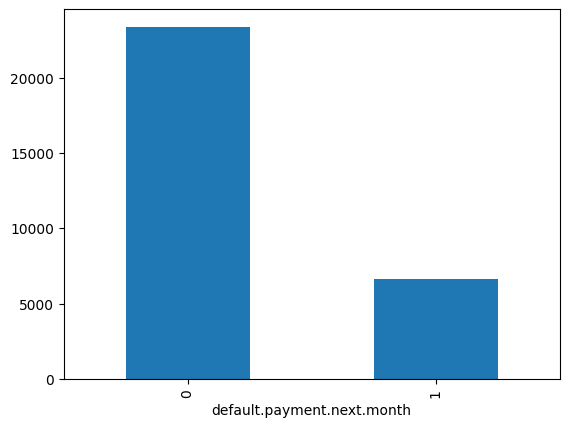

In [3]:
data['default.payment.next.month'].value_counts().plot(kind='bar')

#### Exploratory Data Analysis 

In [4]:
# Check for missing values
print(data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Text(0.5, 0.98, 'Pairplot of selected variables')

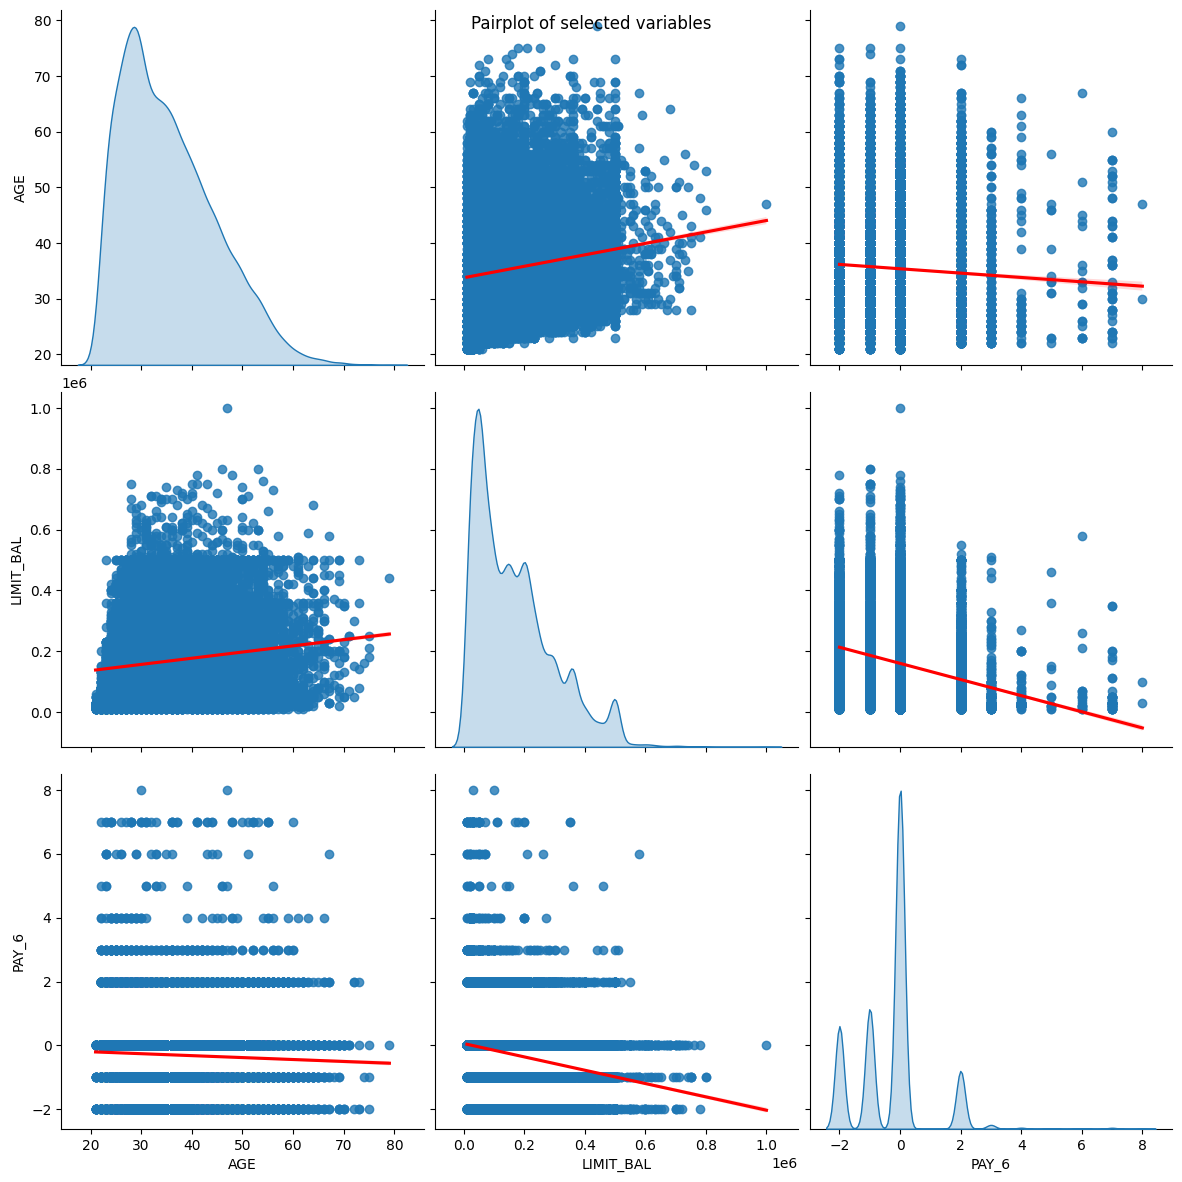

In [5]:
COLS_TO_PLOT = ["AGE", "LIMIT_BAL", "PAY_6"]
pair_plot = sns.pairplot(data[COLS_TO_PLOT], kind="reg", diag_kind="kde", height=4, 
                         plot_kws={"line_kws":{"color":"red"}})
pair_plot.fig.suptitle("Pairplot of selected variables")

In [6]:
# Example of feature engineering
data['bill_to_limit_ratio'] = data['BILL_AMT1'] / data['LIMIT_BAL']

#### Data Splitting

In [7]:
X = data.drop(columns=['ID', 'default.payment.next.month'])
y = data['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Model Building

In [8]:
# Instantiate the model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.80
[[6867  173]
 [1608  352]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7040
           1       0.67      0.18      0.28      1960

    accuracy                           0.80      9000
   macro avg       0.74      0.58      0.58      9000
weighted avg       0.78      0.80      0.75      9000



c:\Users\ranje\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Advanced Models

In [9]:
# Instantiate and fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')

Random Forest Accuracy: 0.81


#### Model Evaluation

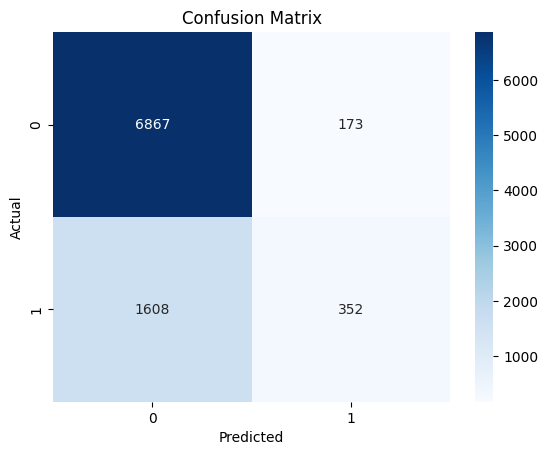

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

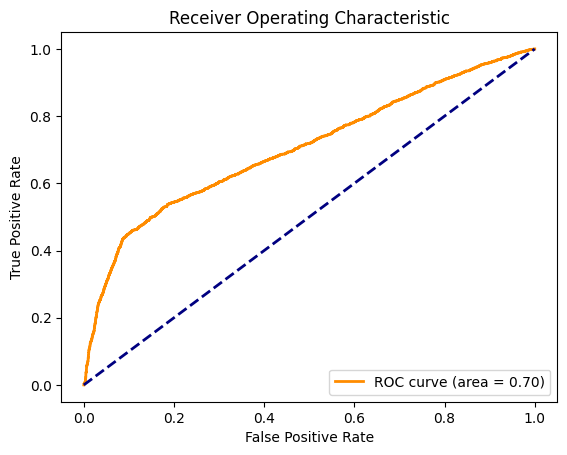

In [11]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


#### SUMMARY

### Accuracy
##### Logistic Regression Model Accuracy
Around 0.80(80%) Accuracy achived on the test dataset. This indicates that the model correctly classified 80% of the cases as either default or non-default.

##### Random Forest Model Accuracy
The Random Forest model slightly outperformed Logistic Regression with an accuracy of around 0.81 (81%).